In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
config_file = '../ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = '../frozen_inference_graph.pb'

In [3]:
model = cv2.dnn_DetectionModel(frozen_model, config_file)

model.setInputSize(320, 320)
model.setInputScale(1.0/127.5) # 255 / 2 = 127.5
model.setInputMean((127.5, 127.5, 127.5)) # mobilenet => [-1, 1]
model.setInputSwapRB(True)

< cv2.dnn.Model 0000016B90E83F30>

In [4]:
classlabels = []
file_name = '../labels.txt'
with open(file_name, 'rt') as fpt:
    classlabels = fpt.read().rstrip('\n').split('\n')
# print(classlabels)

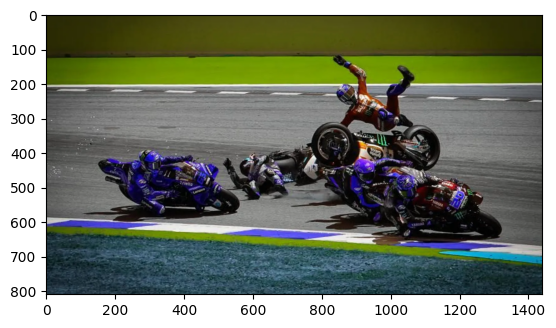

In [5]:
img = cv2.imread('../motogp3.png')
plt.imshow(img)

In [6]:
ClassIndex, confidence, bbox = model.detect(img, confThreshold=0.48)

In [7]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    cv2.rectangle(img, boxes, (255, 0, 0), 2)
    cv2.putText(img, classlabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale=font_scale, color=(0, 255, 0), thickness=3)

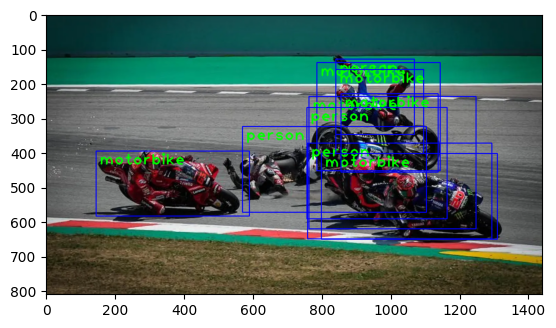

In [8]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))